In [18]:
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
data = load_wine()


In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [20]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
data.data.shape

(178, 13)

In [6]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [36]:
import pandas as pd
wine_data_pd = pd.DataFrame(data.data, columns=data.feature_names)
wine_data_pd

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
X = data.data
y = data.target

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [26]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.88      0.93        16
           2       0.91      0.91      0.91        11

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.91        36
weighted avg       0.93      0.92      0.92        36



In [27]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = model.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [32]:
from sklearn import svm
svm_cl = svm.SVC()
svm_cl.fit(X_train, y_train)
y_pred_svm = svm_cl.predict(X_test)

print(classification_report(y_test, y_pred_svm, zero_division=0))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       0.61      0.88      0.72        16
           2       0.00      0.00      0.00        11

    accuracy                           0.64        36
   macro avg       0.43      0.62      0.51        36
weighted avg       0.44      0.64      0.52        36



In [29]:
from sklearn.linear_model import SGDClassifier
sgd_cl = SGDClassifier()
sgd_cl.fit(X_train, y_train)
y_pred_sgd = sgd_cl.predict(X_test)

print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.72      0.81      0.76        16
           2       0.67      0.55      0.60        11

    accuracy                           0.75        36
   macro avg       0.76      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36



In [33]:
from sklearn.linear_model import LogisticRegression
logistic_cl = LogisticRegression(max_iter=2499)
logistic_cl.fit(X_train, y_train)
y_pred_logi = logistic_cl.predict(X_test)

print(classification_report(y_test, y_pred_logi))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.94      0.94      0.94        16
           2       1.00      0.91      0.95        11

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



In [ ]:
와인 분류에서는 Random Forest모델이 가장 높은 성능을 보이는것으로 보인다.
그이유는 feature가 많아 랜덤으로 생성되는 트리에서 다양한 선택지가 나타나지만
클래스가 많지 않고 feature간에 연관성이 높은것으로 보인다. 


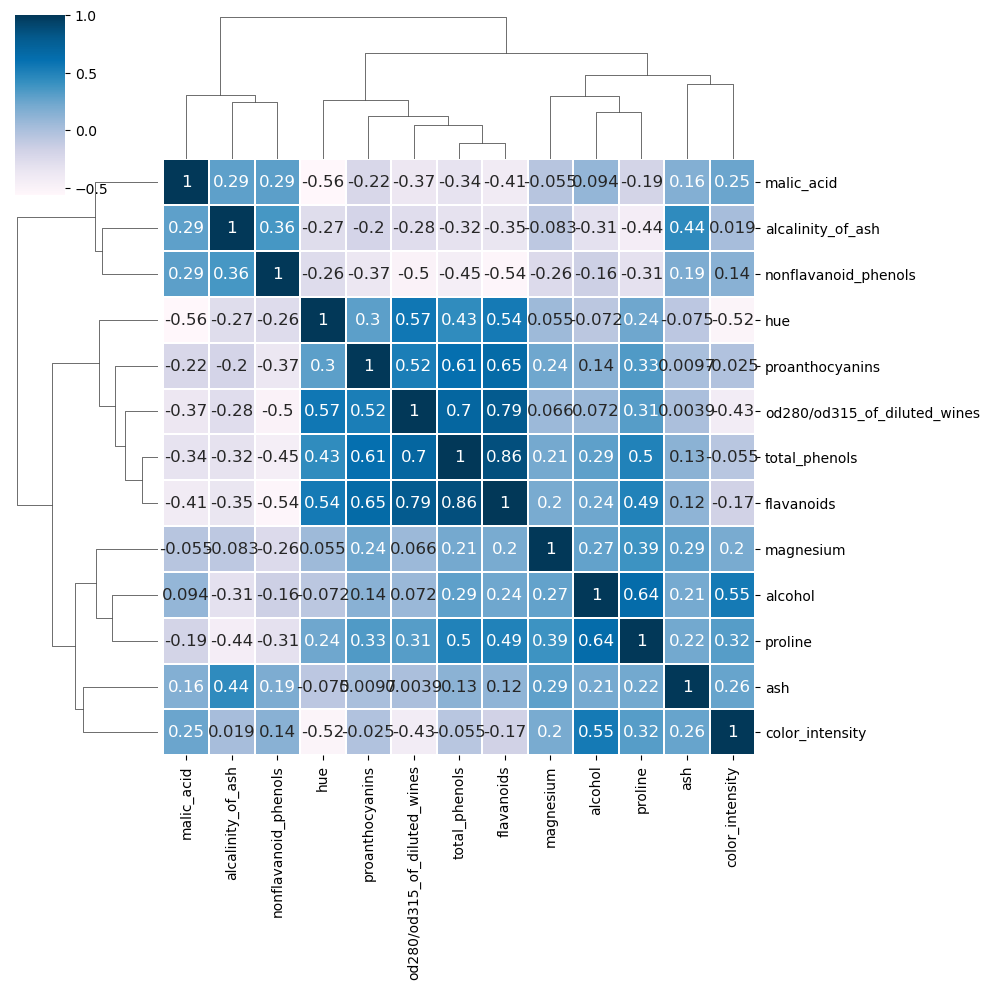

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = wine_data_pd[['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']]
colormap = plt.cm.PuBu
sns.clustermap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 12})

In [ ]:
클러스터 맵으로 분석해 보려 했지만 봐도 잘 모르겠다.